In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

2023-04-17 19:56:56.067965: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-17 19:57:00.175919: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-17 19:57:00.176498: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 19:57:06.556827: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion

In [2]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator

# Parameters
batch_size = 32
epochs = 1 # will increase epoch in next part to save time
data_augmentation = True

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Create the CNN model
model = Sequential()

# 1st convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 2nd convolutional layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 1st max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd convolutional layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 4th convolutional layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 2nd max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 5th convolutional layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 3rd max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# 1st fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 2nd fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
if data_augmentation:
    datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True)
    
    datagen.fit(x_train)
    
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        steps_per_epoch=len(x_train) // batch_size)
else:
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        shuffle=True)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

170498071/170498071 [==============================] - 3s 0us/step


2023-04-17 19:57:37.911013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


313/313 [==============================] - 17s 54ms/step - loss: 1.2986 - accuracy: 0.5535
Test loss: 1.2986253499984741
Test accuracy: 0.5534999966621399


Epoch 1/10
228/228 [==============================] - 7s 27ms/step - loss: 2.2770 - accuracy: 0.1584 - val_loss: 2.2551 - val_accuracy: 0.1789
Epoch 2/10
228/228 [==============================] - 6s 26ms/step - loss: 0.8569 - accuracy: 0.7079 - val_loss: 0.3671 - val_accuracy: 0.8909
Epoch 3/10
228/228 [==============================] - 6s 27ms/step - loss: 0.2643 - accuracy: 0.9187 - val_loss: 0.2600 - val_accuracy: 0.9273
Epoch 4/10
228/228 [==============================] - 6s 27ms/step - loss: 0.1854 - accuracy: 0.9427 - val_loss: 0.2318 - val_accuracy: 0.9337
Epoch 5/10
228/228 [==============================] - 6s 27ms/step - loss: 0.1498 - accuracy: 0.9550 - val_loss: 0.2043 - val_accuracy: 0.9472
Epoch 6/10
228/228 [==============================] - 6s 27ms/step - loss: 0.1191 - accuracy: 0.9621 - val_loss: 0.2118 - val_accuracy: 0.9462
Epoch 7/10
228/228 [==============================] - 6s 27ms/step - loss: 0.1105 - accuracy: 0.9667 - val_loss: 0.1868 - val_accuracy: 0.9527

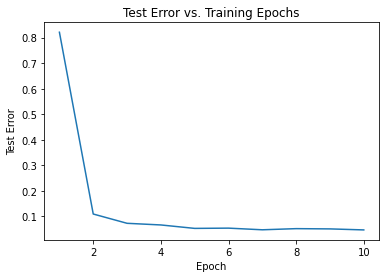

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
# Load and preprocess data
train_data = pd.read_csv('zip.train', sep=' ', header=None)
test_data = pd.read_csv('zip.test', sep=' ', header=None)



x_train = train_data.iloc[:, 1:-1].values.reshape(-1, 16, 16, 1) / 255
y_train = to_categorical(train_data.iloc[:, 0].values, num_classes=10)

x_test = test_data.iloc[:, 1:].values.reshape(-1, 16, 16, 1) / 255
y_test = to_categorical(test_data.iloc[:, 0].values, num_classes=10)

# Create the CNN model
model = Sequential()

# Create the CNN model
model = Sequential()

# Add layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(16, 16, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

# Evaluate the model
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Plot the test error as a function of training epochs
plt.plot(range(1, epochs + 1), 1 - np.array(history.history['val_accuracy']))
plt.xlabel('Epoch')
plt.ylabel('Test Error')
plt.title('Test Error vs. Training Epochs')
plt.show()

